In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dff=pd.read_csv(r"C:\Users\rajit\OneDrive\Desktop\practice_datasets\Default_Fin.csv")

In [4]:
dff

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [6]:
dff.drop("Index",axis=1,inplace=True)

In [7]:
dff

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


# checking nan

In [8]:
dff.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

# checking outliers

<Axes: >

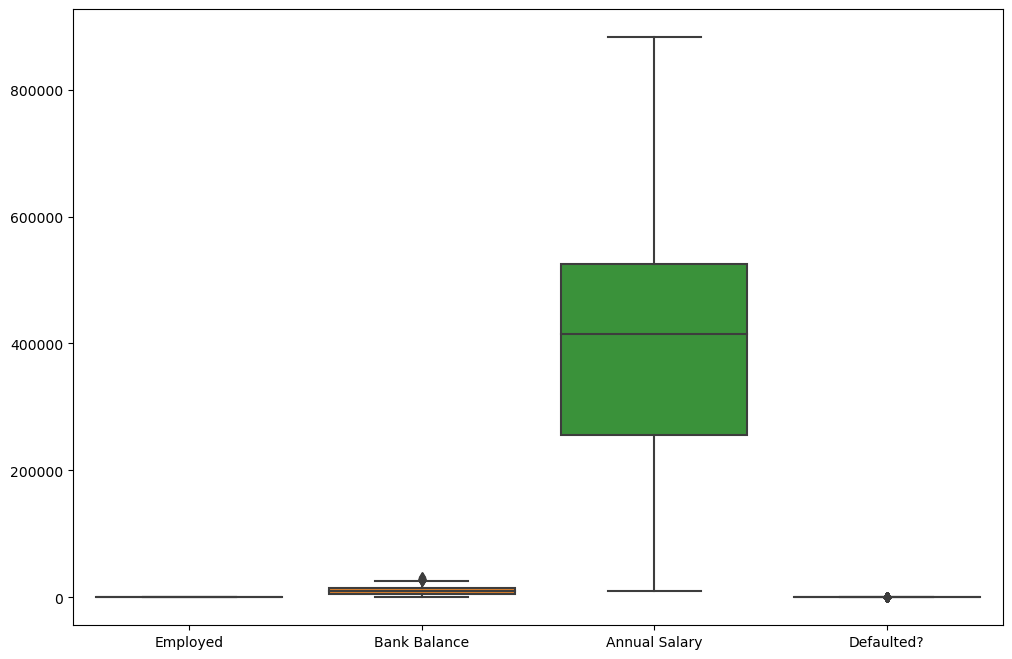

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(dff)


In [14]:
dff["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

# undersampling manually

In [15]:
dff["Defaulted?"]==0

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Defaulted?, Length: 10000, dtype: bool

In [16]:
dff[dff["Defaulted?"]==0]

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [18]:
dff0=dff[dff["Defaulted?"]==0].sample(333)

In [19]:
dff0

,Employed,Bank Balance,Annual Salary,Defaulted?
5258,1,0.00,559388.40,0
4279,1,11087.88,333819.00,0
1859,1,9734.04,506225.28,0
4125,0,13150.44,193530.24,0
1529,1,6284.52,577100.88,0
...,...,...,...,...
275,0,18036.96,127204.92,0
1295,1,21965.64,288641.76,0
8150,1,13447.44,582855.12,0
9499,1,13883.88,641403.24,0


In [20]:
dff["Defaulted?"]==1

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Defaulted?, Length: 10000, dtype: bool

In [21]:
dff[dff["Defaulted?"]==1]

,Employed,Bank Balance,Annual Salary,Defaulted?
136,0,17844.00,214252.80,1
173,0,26469.60,171257.88,1
201,0,21296.28,244314.12,1
206,1,22675.20,587474.04,1
209,0,22792.68,247862.40,1
...,...,...,...,...
9912,1,25786.80,531719.04,1
9921,0,19534.80,210564.00,1
9949,1,21003.00,618947.28,1
9951,1,18187.32,584262.12,1


In [22]:
dff1=dff[dff["Defaulted?"]==1]

In [23]:
dff1

,Employed,Bank Balance,Annual Salary,Defaulted?
136,0,17844.00,214252.80,1
173,0,26469.60,171257.88,1
201,0,21296.28,244314.12,1
206,1,22675.20,587474.04,1
209,0,22792.68,247862.40,1
...,...,...,...,...
9912,1,25786.80,531719.04,1
9921,0,19534.80,210564.00,1
9949,1,21003.00,618947.28,1
9951,1,18187.32,584262.12,1


In [25]:
dffinal=pd.concat([dff0,dff1])

In [26]:
dffinal

,Employed,Bank Balance,Annual Salary,Defaulted?
5258,1,0.00,559388.40,0
4279,1,11087.88,333819.00,0
1859,1,9734.04,506225.28,0
4125,0,13150.44,193530.24,0
1529,1,6284.52,577100.88,0
...,...,...,...,...
9912,1,25786.80,531719.04,1
9921,0,19534.80,210564.00,1
9949,1,21003.00,618947.28,1
9951,1,18187.32,584262.12,1


In [28]:
dffinal.reset_index(inplace=True)

In [29]:
dffinal

,index,Employed,Bank Balance,Annual Salary,Defaulted?
0,5258,1,0.00,559388.40,0
1,4279,1,11087.88,333819.00,0
2,1859,1,9734.04,506225.28,0
3,4125,0,13150.44,193530.24,0
4,1529,1,6284.52,577100.88,0
...,...,...,...,...,...
661,9912,1,25786.80,531719.04,1
662,9921,0,19534.80,210564.00,1
663,9949,1,21003.00,618947.28,1
664,9951,1,18187.32,584262.12,1


In [32]:
dffinal.drop("index",axis=1,inplace=True)

In [33]:
dffinal

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,0.00,559388.40,0
1,1,11087.88,333819.00,0
2,1,9734.04,506225.28,0
3,0,13150.44,193530.24,0
4,1,6284.52,577100.88,0
...,...,...,...,...
661,1,25786.80,531719.04,1
662,0,19534.80,210564.00,1
663,1,21003.00,618947.28,1
664,1,18187.32,584262.12,1


In [34]:
X=dffinal.drop("Defaulted?",axis=1)

In [35]:
X

,Employed,Bank Balance,Annual Salary
0,1,0.00,559388.40
1,1,11087.88,333819.00
2,1,9734.04,506225.28
3,0,13150.44,193530.24
4,1,6284.52,577100.88
...,...,...,...
661,1,25786.80,531719.04
662,0,19534.80,210564.00
663,1,21003.00,618947.28
664,1,18187.32,584262.12


In [36]:
y=dffinal['Defaulted?']

In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
661    1
662    1
663    1
664    1
665    1
Name: Defaulted?, Length: 666, dtype: int64

# splitting the data into training and testing

In [38]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)



In [39]:
X.shape,X_train.shape,X_test.shape

((666, 3), (532, 3), (134, 3))

In [40]:
y.shape,y_train.shape,y_test.shape

((666,), (532,), (134,))

# by using auto ML #

In [42]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [44]:


LR_model=LogisticRegression()
SV_model=SVC()
DT_model=DecisionTreeClassifier()
AD_model=AdaBoostClassifier()
GD_model=GradientBoostingClassifier()
RF_model=RandomForestClassifier()
KN_model=KNeighborsClassifier()

m_list=(LR_model,SV_model,DT_model,AD_model,GD_model,RF_model,KN_model)




In [46]:
for m in m_list:
    m.fit(X_train,y_train)
    s=m.score(X_test,y_test)
    print(m,end="==")
    print(s)


LogisticRegression()==0.7611940298507462
SVC()==0.5597014925373134
DecisionTreeClassifier()==0.8432835820895522
AdaBoostClassifier()==0.8731343283582089
GradientBoostingClassifier()==0.8656716417910447
RandomForestClassifier()==0.8805970149253731
KNeighborsClassifier()==0.8283582089552238


In [ ]:
# so RandomForestClassifier score is high,we go with this model